<img align="right" style="max-width: 200px; height: auto" src="https://github.com/HSG-AIML-Teaching/MLBBWL-2023FS/blob/main/lab_02/hsg_logo.png?raw=1">

#  Lab 2 - "Unsupervised Learning with Scikit-Learn"

Machine Learning (BBWL), University of St. Gallen, Spring Term 2023, Michael Mommert

In our previous lecture, we discussed different unsupervised learning methods with a focus on **clustering** and **dimensionality reduction**. Today, we will apply some of these methods to different data modalities.

## Lab Objectives:
* comparing different clustering methods for our Iris data set
* clustering applied to image data
* dimensionality reduction

Before we get started, let's import numpy and define a random seed value:

In [1]:
import numpy as np

random_seed = 42

## Clustering the Iris data set

We revisit our famous Iris data set:

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
x = data.data
y = data.target
x.shape, y.shape

((150, 4), (150,))

As a quick reminder: the data set (`x`) contains features for 150 iris flowers. The features are petal length, petal width, sepal length and sepal width. For each speciment we also know the class of flower it has been attributed to by a botanist (`y`).

Let's plot some two-dimensional projections of the four-dimensional data set:

Text(0, 0.5, 'petal width (cm)')

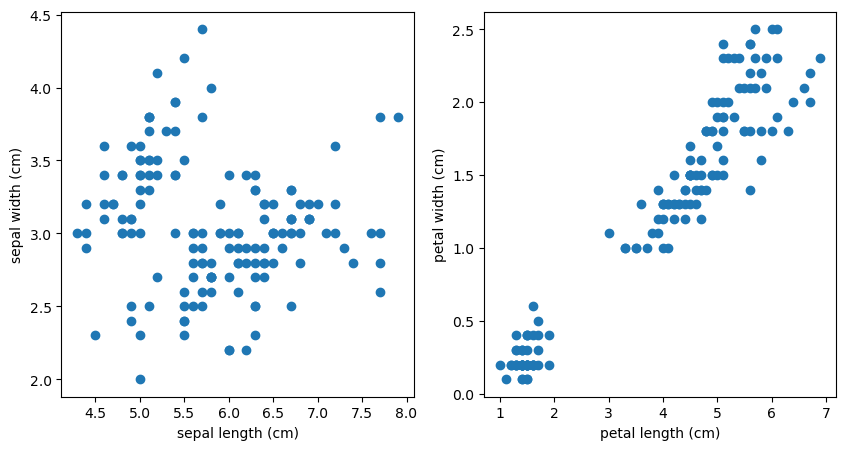

In [3]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(x[:,0], x[:,1])
ax1.set_xlabel(data.feature_names[0])
ax1.set_ylabel(data.feature_names[1])

ax2.scatter(x[:,2], x[:,3])
ax2.set_xlabel(data.feature_names[2])
ax2.set_ylabel(data.feature_names[3])

The plots clearly show structure in the data: if we ignore the labels (since we are doing unsupervised learning here), there seem to be 2 or three clusters in the data. 

Of course, we do know the ground-truth labels for each of those data points. If we take advantage of these labels, the plot would look like this, exposing the different clusters based on their different class affiliations:

Text(0, 0.5, 'petal width (cm)')

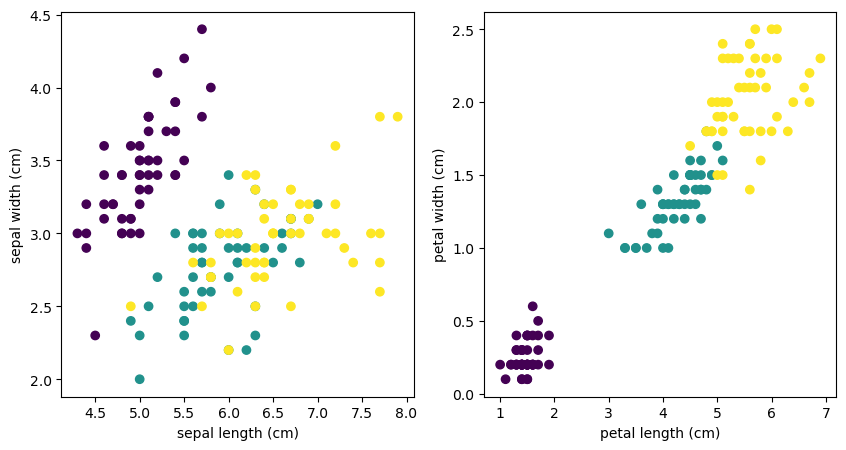

In [4]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(x[:,0], x[:,1], c=y)
ax1.set_xlabel(data.feature_names[0])
ax1.set_ylabel(data.feature_names[1])

ax2.scatter(x[:,2], x[:,3], c=y)
ax2.set_xlabel(data.feature_names[2])
ax2.set_ylabel(data.feature_names[3])

Now let's use some clustering methods to see how well we can identify these clusters.

### K-means


We start with a simple $k$-means clustering algorithm.

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# train and apply k-Means
model = KMeans(n_clusters=3, n_init=random_seed)
pred = model.fit_predict(x_scaled)


Please note how similar the `sklearn` API is to the supervised methods that we got to know two weeks ago. In fact, you might wonder why there is even a `predict` method, since we are only doing unsupervised learning.

Text(0, 0.5, 'petal width (cm)')

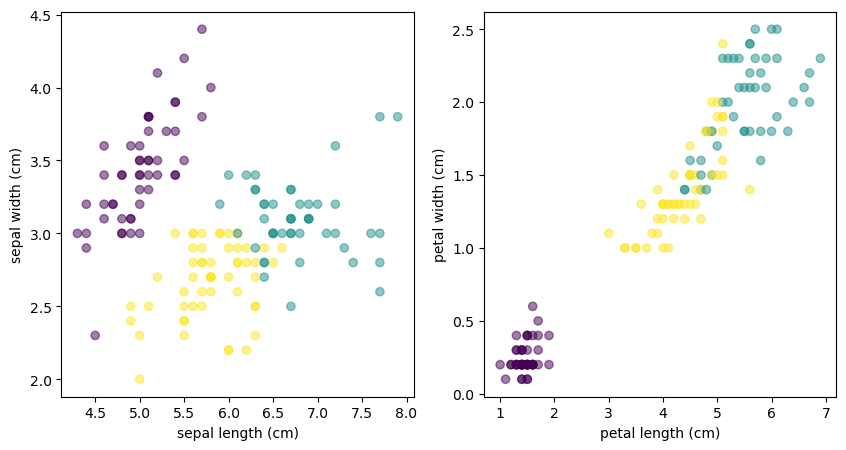

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(x[:,0], x[:,1], c=pred, alpha=0.5)
ax1.set_xlabel(data.feature_names[0])
ax1.set_ylabel(data.feature_names[1])

ax2.scatter(x[:,2], x[:,3], c=pred, alpha=0.5)
ax2.set_xlabel(data.feature_names[2])
ax2.set_ylabel(data.feature_names[3])

The result looks good for $k=2$ - the two obvious clusters are easily separated.

**Question**: What about $k=3$?

What you should observe is that $k$-Means for $k=3$ indeed does a decent job at identifying the three clusters. Keep in mind that the goal here is not to replicate the class labels like in supervised learning. Instead, this method simply identifies agglomerations of data points and those often (but not always!) coincide with different classes of data points. 

## More complex clustering examples

### Circles data set

We will create a *circles* data set of two co-aligned circles:

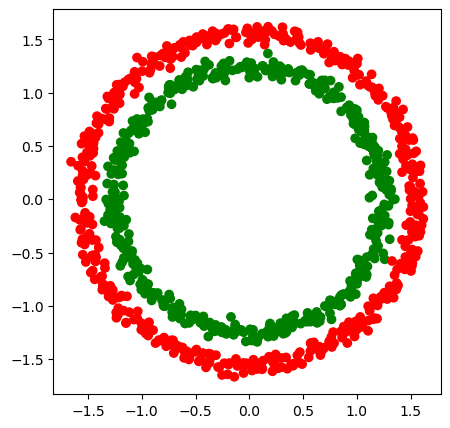

In [14]:
from sklearn.datasets import make_circles

# generate data set
x, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
x = scaler.fit_transform(x) # scale the data set

f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green'}[l] for l in y])


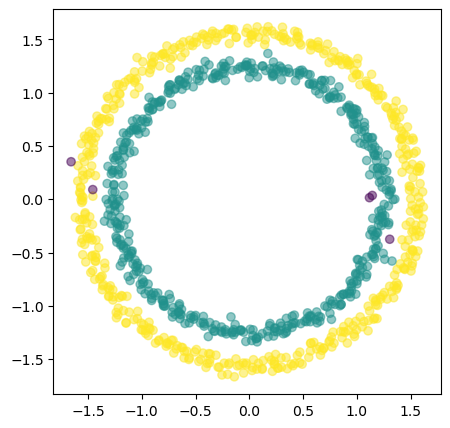

In [76]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'moons', convert it to a NumPy array
data = x

# use dbscan to find clusters
model = DBSCAN(eps=0.11, min_samples=7)
pred = model.fit_predict(data)

# plot the results
f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(data[:,0], data[:,1], c=pred, alpha=0.5)

In [79]:
import numpy as np
import pandas as pd
import hdbscan
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'moons', convert it to a NumPy array
data = x

# Standardize the data for better performance
data = StandardScaler().fit_transform(data)

# Use HDBSCAN to find clusters
model = hdbscan.HDBSCAN(min_cluster_size=7)
pred = model.fit_predict(data)

# Plot the results
f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(data[:, 0], data[:, 1], c=pred, alpha=0.5)
plt.show()

ModuleNotFoundError: No module named 'hdbscan'

We already saw that $k$-Means will fail with this data set:

Text(0.5, 1.0, 'Prediction')

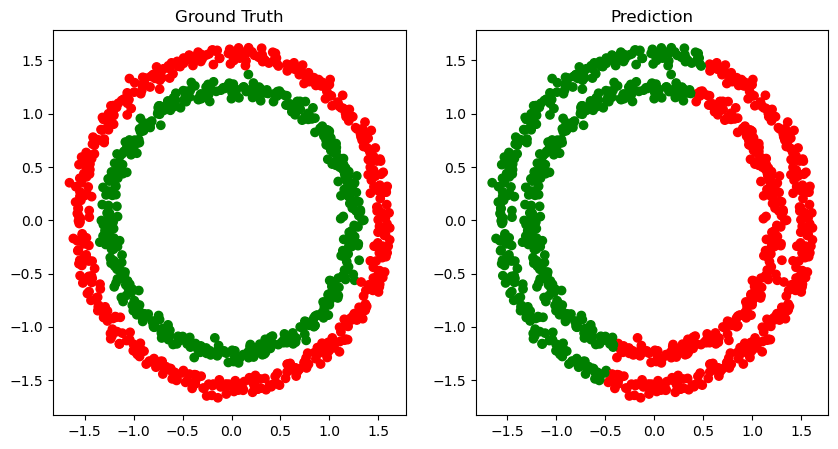

In [15]:
model = KMeans(n_clusters=2, n_init=random_seed)
pred = model.fit_predict(x)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green'}[l] for l in y])
ax1.set_title('Ground Truth')
ax2.scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green'}[l] for l in pred])
ax2.set_title('Prediction')

**Question**: Why does $k$-Means fare badly in this case?

**Question**: What other clustering method might provide better results in this specific case? Can you implement it here?

### Noisy data

In the following example we will try to reveal clusters in a noisy data set. *Noisy* refers here to the fact that in addition to the different clusters, the data set also contains a number of background data points that do not belong to either cluster. This situation is rather common in real life.

In [ ]:
from sklearn.datasets import make_blobs
from numpy.random import random
np.random.seed(random_seed)

# generate data set
x, y = make_blobs(n_samples=500, n_features=2, random_state=42)
x_noise = random((200, 2))*(x.max()-x.min())+x.min()
x = np.vstack([x, x_noise])
y = np.hstack([y, [-1]*len(x_noise)])

f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x[:,0], x[:,1], color=[{-1:'gray', 0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])


Let's check $k$-means, assuming that we know that there are 3 clusters:

In [ ]:
model = KMeans(n_clusters=3, n_init=random_seed)
pred = model.fit_predict(x)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x[:,0], x[:,1], color=[{-1: 'gray', 0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
ax1.set_title('Ground Truth')
ax2.scatter(x[:,0], x[:,1], color=[{-1: 'gray', 0: 'red', 1: 'green', 2: 'blue'}[l] for l in pred])
ax2.set_title('Prediction')

$k$-Means can identify the clusters properly, but it also picks up all the noise and assigns it to a cluster.


**Question**: Is there a clustering method that can deal with noise? If so, implement it!

## Clustering of image data

We now saw plenty of examples for how to apply clustering methods to numerical data. What about image data? Can we cluster images?

Let's download some images of hand-written digits:

In [80]:
from sklearn.datasets import load_digits

data = load_digits()

x = data.data
y = data.target
x.shape

(1797, 64)

What do they look like?

In [81]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Hmm. That's a linearized image. Let's reshape the vector and plot the result:

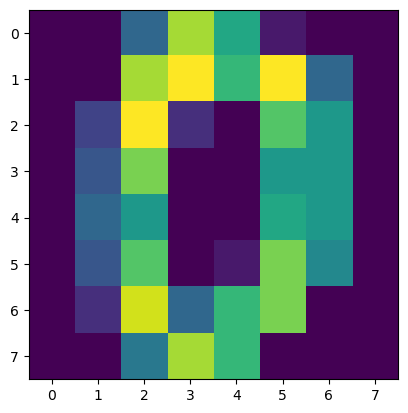

In [84]:
plt.imshow(x[0].reshape(8 ,8))

That's a zero, right?

In [85]:
y[0]

0

Correct!

But can we simply apply clustering to the linearized image data? Let's try:

In [86]:
model = KMeans(n_clusters=10, n_init=random_seed)
pred = model.fit_predict(x)

Ok, but how do we check if it learned anything useful? We can average all images that belong to the same cluster and have a look at the averaged images:

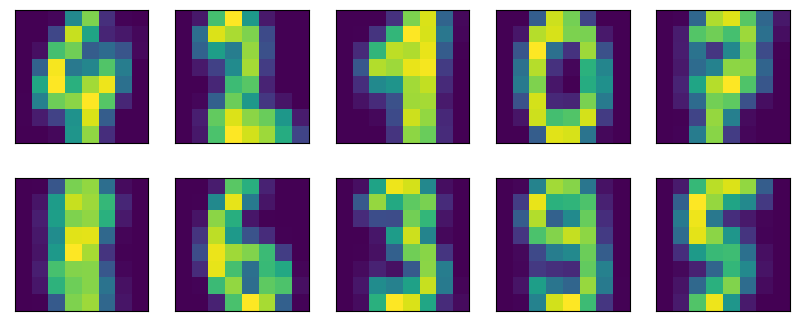

In [87]:
digits = np.empty((10, 64))
# create average images 
for i in range(10):
    digits[i] = np.average(x[pred == i], axis=0)

# reshape the vectors to 8x8 images
digits = digits.reshape(10, 8, 8)

f, ax = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
ax = np.ravel(ax)

for i in range(10):
    ax[i].imshow(digits[i])
    ax[i].set_xticks([])
    ax[1].set_yticks([])

Those look like decent digits. Is it possible that we can cluster these vectorized images of digits with something as simple as $k$-Means?

Let's do a quick check: we will extract the ground-truth labels of our cluster members individually:

In [88]:
y[pred == 4]

array([7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 3, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 9, 7, 7,
       7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 4, 7,
       7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 4, 7, 7, 3, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 3, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       7, 7, 7, 3, 7, 3, 7, 7, 4, 9, 7, 7, 7, 7, 4, 8, 7, 7, 7, 7, 7, 3,
       7, 7, 7, 7, 7, 7, 7, 7])

Naturally, the indices do not coincide with the digits displayed, since the cluster ids are assigned randomly. But it seems to be the case that most samples of the same cluster show the same digit.

Think about this for a minute: the images are stored in a 64-dimensional (8x8 image maps) feature space and $k$-means is able to identify the 10 different classes that populate this 64-dimensional feature space with high confidence!

## Dimensionality reduction with Principal Components Analysis (PCA)

Let's go back to the Iris data set and see whether we can reduce it to a smaller dimensionality.

In [89]:
data = load_iris()
x = data.data
y = data.target
x.shape, y.shape

((150, 4), (150,))

Let's have a look at the pair plot for this data set:

<Figure size 1000x1000 with 0 Axes>

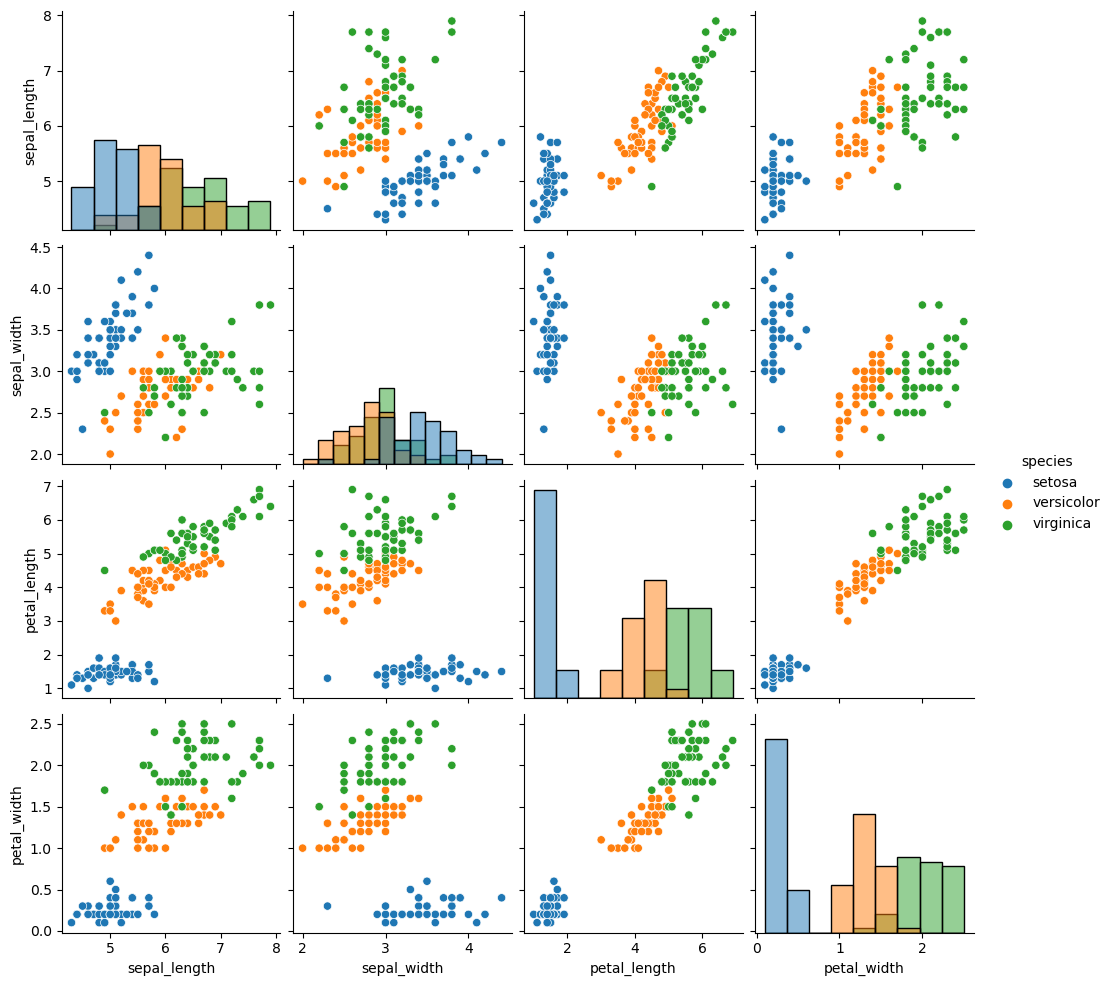

In [90]:
import seaborn as sns

plt.figure(figsize=(10, 10))
iris_plot = sns.load_dataset("iris")
sns.pairplot(iris_plot, diag_kind='hist', hue='species')

PCA is very sensitive to data scaling: the mean of the data set should always be zero, the variance in each feature should be unity. This is not the case here. Therefore, we have to apply scaling with the Standard Scaler, which meets these requirements:

In [91]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Let's apply the PCA:

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

pca.fit(x)

PCA(n_components=4)

Note that we derive 4 principal components here: this is the maximum number of components. We do not have to use all of them later. By default, all principal components are ordered by importance, the first one being the most important one, the last one being the least important one. Therefore, we can simply extract a slice of the prinicipal components (we will do this later).

Let's have a quick look at the shape of the principal components:

In [93]:
pca.components_.shape

(4, 4)

Of course, this representation is symmetric (4 original features and 4 principal components). Interpreted as a matrix, the rows refer to the different principal components, the columns refer to the original feature vectors based on which the principal components are described.

We can now transform any data point into a representation based on the principal components:

In [94]:
pca.transform(x[0].reshape(1, -1))

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ]])

We plan to apply dimensionality reduction. So how many principal components should we keep? Let's have a look at the explained variance for the different components:

In [95]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Let's plot the results:

Text(0, 0.5, 'Cumulative explained variance')

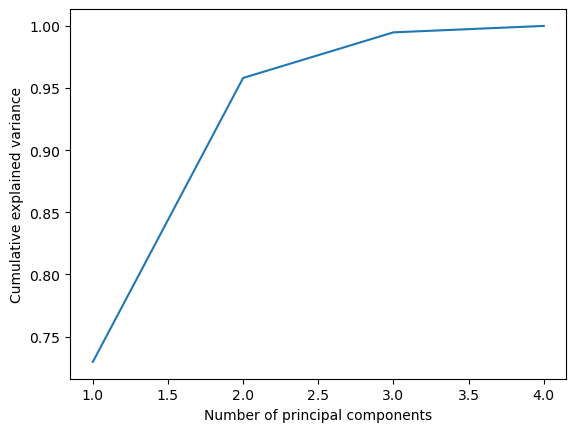

In [96]:
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')

Interesting. We can reduce this data set to only two principal components and this still enables us to reproduce 95.8% of the variance in the data set. Let's rederive the PCA using only two principal components and plot the transformed data set:

In [97]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca.shape

(150, 2)

We plot the transformed data:

Text(0.5, 0, 'PCA2')

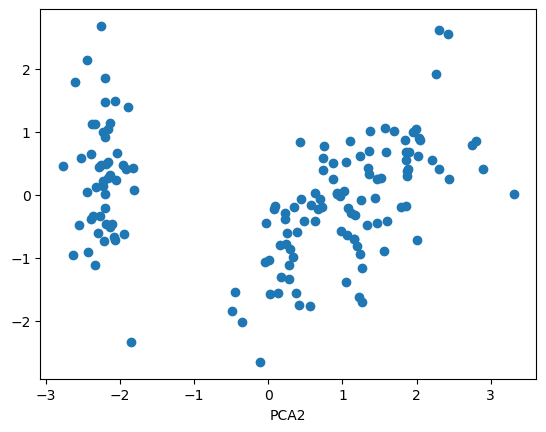

In [98]:
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel('PCA1')
plt.xlabel('PCA2')

This looks very similar to some of the pair plots that we saw earlier - which makes sense: performing PCA is the equivalent of rotating the data and projecting it to a lower dimensional space.

## Performing PCA on image data

We will now perform PCA to some image data to get a better understanding of what it does.

First we have to download an image data set containing 400 faces of 40 different people. Each sample is a linearized 64x64 image map.

In [99]:
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()

x = data.data
y = data.target
x.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\lukas\scikit_learn_data


(400, 4096)

Let's plot the first 100 images in the data set to get a better idea of the data:

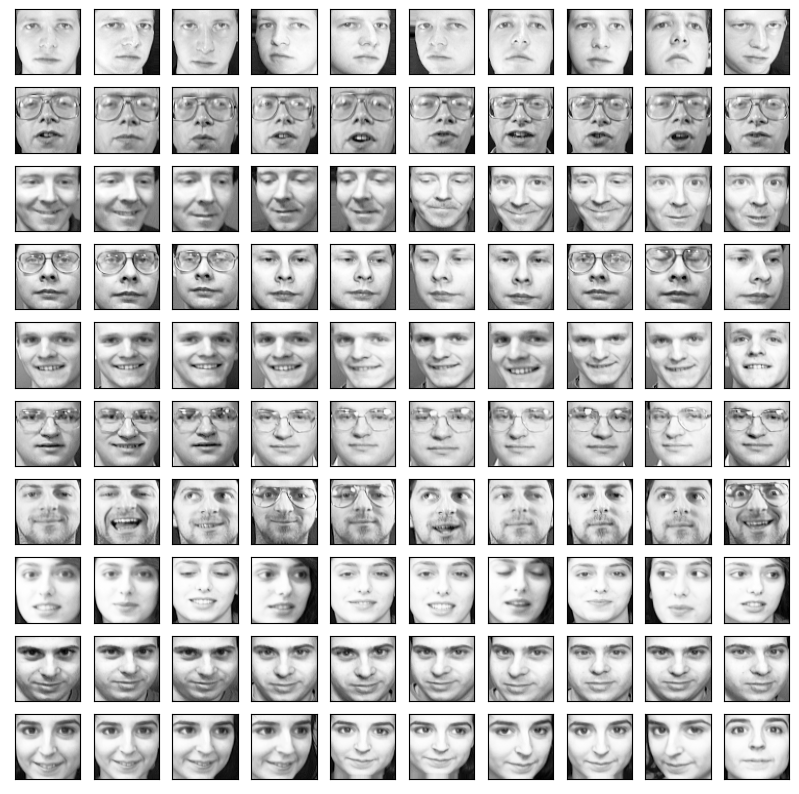

In [100]:
f, ax = plt.subplots(10, 10, figsize=(10, 10))
ax = np.ravel(ax)

for i in range(100): 
    ax[i].imshow(x[i].reshape(64,64), cmap='Greys_r')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

Ok, so there's 10 images of each person taken from different angles. 

The question now is: can we represent this data set in a lower dimensional space (current dimensionality: 4096=64x64)?

Let's try PCA:

In [101]:
pca = PCA(n_components=200)
pca.fit(scaler.fit_transform(x))

PCA(n_components=200)

Let us have a look at the first 10 principal components. Disclaimer: there's some spooky faces...

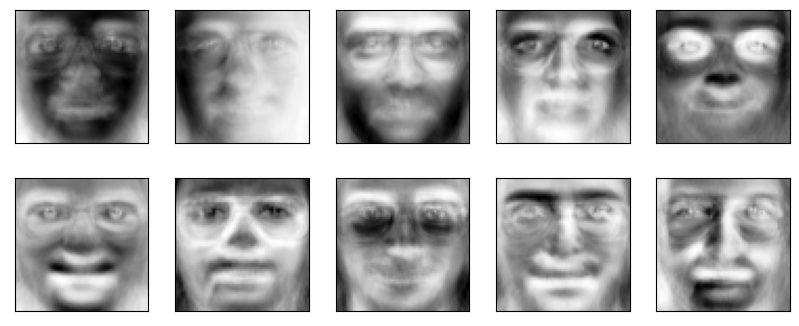

In [102]:
f, ax = plt.subplots(2, 5, figsize=(10, 4))
ax = np.ravel(ax)

for i in range(10):
    ax[i].imshow(pca.components_[i].reshape(64, 64), cmap='Greys_r')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

All those principal components look a little bit like faces. Each principal component describes a different set of features in images of faces:
* The first component is a dark face with a bright background.
* The second component is brighter to the right than to the left.
* The third component has dark cheeks.
* The fourth component has well-defined eyes and features of glasses.
* The fifth component has bright regions around the eyes.

... and so on. Each principal components covers different features of faces. This is the **feature selection** part of PCA: the method extracts the most important features.

By transforming an original image based on the PCA transformation, we can reassemble that image based on those principal components. Taking advantage of the **dimensionality reduction** part of PCA, we will only utilize a subset of available principal components: 

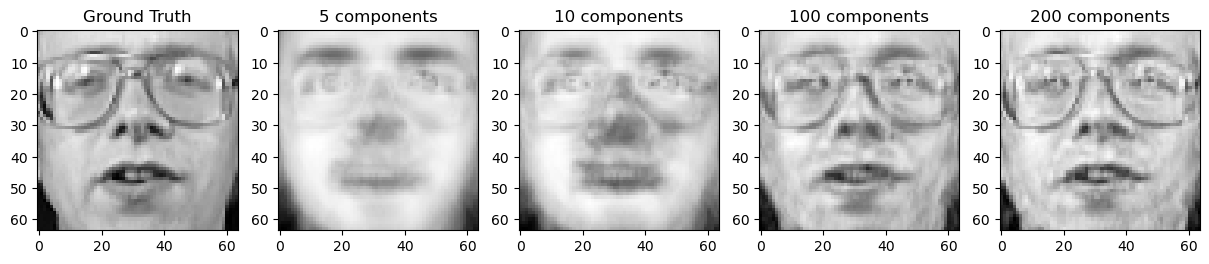

In [103]:
f, ax = plt.subplots(1, 5, figsize=(15 ,3))
ax = np.ravel(ax)

m = 10  # face id

ax[0].imshow(x[m].reshape(64, 64), cmap='Greys_r')
ax[0].set_title('Ground Truth')

for i, j in enumerate([4, 9, 99, 199]):
    ax[i+1].imshow(np.sum(pca.transform(x[m].reshape(1, -1))[0, :j]*pca.components_[:j].transpose(), axis=1).reshape(64,64), cmap='Greys_r')
    ax[i+1].set_title('{} components'.format(j+1))


Naturally, the more principal components we consider, the better is the quality of the reconstruction. The image quality based on 100 principal components is already pretty good. 

Make yourself aware what this means: we can store an image of a person with 4096 pixels by storing only 100 values, if we know the corresponding principal components. Pretty neat, right? 